In [1]:
# https://keras.io/zh/optimizers/#_1 kare 中文文档

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import sklearn
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras
print(tf.__version__)
print(sys.version_info)
for module in np, pd ,sklearn, tf, keras:
    print(module.__name__,module.__version__)

2.0.0
sys.version_info(major=3, minor=7, micro=7, releaselevel='final', serial=0)
numpy 1.18.1
pandas 1.0.4
sklearn 0.22.2
tensorflow 2.0.0
tensorflow_core.keras 2.2.4-tf


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all,y_train_all),(x_test,y_test) = fashion_mnist.load_data()
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

print(x_valid.shape,y_valid.shape)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)





(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


In [3]:
x_train[1].shape

(28, 28)

In [4]:
x_train[1].max()

255

In [5]:
y_train[:100]

array([4, 0, 7, 9, 9, 9, 4, 4, 3, 4, 0, 1, 8, 6, 3, 6, 4, 3, 2, 8, 7, 3,
       4, 7, 1, 3, 4, 2, 0, 8, 5, 5, 9, 1, 5, 3, 5, 9, 0, 3, 9, 6, 4, 2,
       9, 0, 8, 3, 3, 2, 2, 0, 8, 3, 6, 6, 1, 9, 1, 0, 3, 1, 7, 8, 9, 5,
       4, 5, 6, 3, 0, 7, 9, 8, 0, 3, 2, 6, 2, 5, 8, 2, 3, 9, 5, 2, 8, 1,
       3, 7, 1, 7, 5, 5, 0, 1, 5, 1, 8, 0], dtype=uint8)

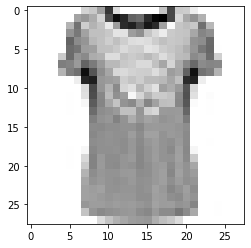

In [6]:
def show_single_img(img_arr):
    plt.imshow(img_arr, cmap='binary')
    plt.show()
    
show_single_img(x_train[1])

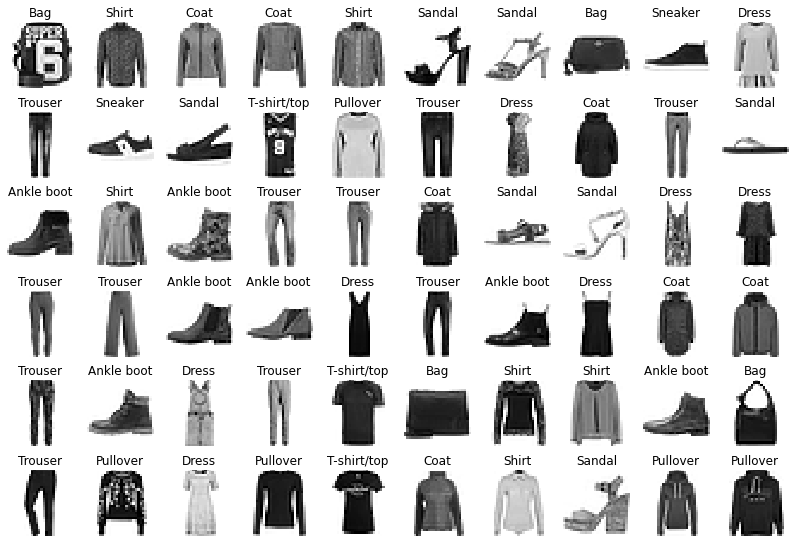

In [7]:
def show_imgs(n_rows, n_cols, x_data, y_data, class_names):
    assert len(x_data) == len(y_data)#验证
    assert n_rows * n_cols < len(x_data)
    plt.figure(figsize = (n_cols*1.4,n_rows*1.6))
    for row in range(n_rows):
        for col in range(n_cols):
            index = n_cols * row + col
            plt.subplot(n_rows, n_cols, index+1)
            plt.imshow(x_data[index], cmap='binary', interpolation='nearest')
            plt.axis('off')
            plt.title(class_names[y_data[index]])
    plt.show()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
show_imgs(6, 10, x_train[1000:], y_train[1000:], class_names)

In [8]:
#tf.keras.models.Sequential()

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape =[28,28]),
    keras.layers.Dense(64,activation='relu'),
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dense(10,activation = 'softmax')
])    
# relu:  y=max(0,x)
# softmax:将向量变成概率分布，x =[x1,x2,x3]
#                y=[e^x1/sum,e^x2/sum,e^x3/sum], sum=e^x1+e^x2+e^x36

# sparse的原因：将y的分类转换为one_hot编码
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
             optimizer = 'adam',
             metrics = ['accuracy'])


In [9]:
model.layers#查看模型层数

In [9]:
model.summary()#d 模型参数

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [10]:
keras.utils.plot_model(model, to_file='model.png')

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


In [20]:
#784*300+300=235500，300*100+100=30100

In [11]:
history = model.fit(x_train,y_train,epochs=5,
         validation_data=(x_valid,y_valid))
#validation_data:训练过程中在验证集验证

Train on 55000 samples, validate on 5000 samples
Epoch 1/5
55000/55000 [==============================] - 13s 243us/sample - loss: 1.9903 - accuracy: 0.5346 - val_loss: 1.2321 - val_accuracy: 0.6290
Epoch 2/5
55000/55000 [==============================] - 11s 207us/sample - loss: 1.0149 - accuracy: 0.6064 - val_loss: 0.8301 - val_accuracy: 0.7038
Epoch 3/5
55000/55000 [==============================] - 12s 209us/sample - loss: 0.7735 - accuracy: 0.7025 - val_loss: 0.6743 - val_accuracy: 0.7442
Epoch 4/5
55000/55000 [==============================] - 12s 213us/sample - loss: 0.6534 - accuracy: 0.7426 - val_loss: 0.6059 - val_accuracy: 0.7856
Epoch 5/5
55000/55000 [==============================] - 12s 212us/sample - loss: 0.5764 - accuracy: 0.7871 - val_loss: 0.5958 - val_accuracy: 0.8082


In [12]:
history.history


{'loss': [1.9903420950456099,
  1.0148823726914147,
  0.7734805609009483,
  0.6534395849227905,
  0.5763500788428567],
 'accuracy': [0.53456366, 0.6064364, 0.70245457, 0.74258184, 0.7870727],
 'val_loss': [1.2321217106819153,
  0.830124294090271,
  0.6742934447288513,
  0.6058946184158325,
  0.5957839678764343],
 'val_accuracy': [0.629, 0.7038, 0.7442, 0.7856, 0.8082]}

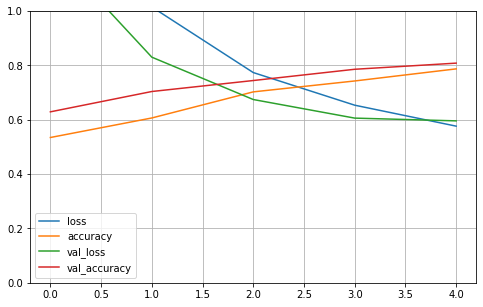

In [13]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=[8,5])
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()

plot_learning_curves(history)